# Neural Networks
> The previous chapters taught you how to build models in TensorFlow 2.0. In this chapter, you will apply those same tools to build, train, and make predictions with neural networks. You will learn how to define dense layers, apply activation functions, select an optimizer, and apply regularization to reduce overfitting. You will take advantage of TensorFlow's flexibility by using both low-level linear algebra and high-level Keras API operations to define and train models. This is the Summary of lecture "Introduction to TensorFlow in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow, Deep_Learning]
- image: images/tf.png

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

tf.__version__

'2.2.0'

## Dense layers

### The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

<img src="./image/3_2_1_network2.png" alt="drawing" style="width:200px;"/>

The input layer contains 3 features -- education, marital status, and age -- which are available as `borrower_features`. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function.

In [2]:
borrower_features = np.array([[2., 2., 43.]], np.float32)

In [3]:
# Initialize bias1
bias1 = tf.Variable(1.0, tf.float32)

# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("dense1's output shape: {}".format(dense1.shape))

dense1's output shape: (1, 2)


In [4]:
# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('prediction: {}'.format(prediction.numpy()[0, 0]))
print('\n actual: 1')

prediction: 0.9525741338729858

 actual: 1


Our model produces predicted values in the interval between 0 and 1. For the example we considered, the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, is not meaningful, since we have not yet trained our model's parameters.

### The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, `weights1`, and bias, `bias1`, are available. We'll then perform matrix multiplication of the `borrower_features` tensor by the `weights1` variable. Recall that the `borrower_features` tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of `products1 + bias1`, yielding `dense1`.

$$ \text{products1} = \begin{bmatrix} 3 & 3 & 23 \\ 2 & 1 & 24 \\ 1 & 1 & 49 \\ 1 & 1 & 49 \\ 2 & 1 & 29 \end{bmatrix} \begin{bmatrix} -0.6 & 0.6 \\ 0.8 & -0.3 \\ -0.09 & -0.08 \end{bmatrix} $$

In [5]:
bias1 = tf.Variable([0.1], tf.float32)

# Compute the product of borrower_features and weights1
products1 = tf.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = tf.keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (1, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (1, 2)


Note that our input data, `borrower_features`, is 5x3 because it consists of 5 examples for 3 features. The shape of `weights1` is 3x2, as it was in the previous exercise, since it does not depend on the number of examples. Additionally, `bias1` is a scalar. Finally, `dense1` is 5x2, which means that we can multiply it by the following set of weights, `weights2`, which we defined to be 2x1 in the previous exercise.

### Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

<img src="./image/10_7_3_1_network.png" alt="drawing" style="width:400px;"/>

To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function.

In [6]:
df = pd.read_csv('./dataset/uci_credit_card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
features = df.columns[1:11].tolist()
borrower_features = df[features].values
borrower_features = tf.convert_to_tensor(borrower_features, np.float32)
idx = tf.constant(list(range(0,100)))
borrower_features = tf.gather(borrower_features, idx)

In [8]:
# Define the first dense layer
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


With just 8 lines of code, you were able to define 2 dense hidden layers and an output layer. This is the advantage of using high-level operations in tensorflow. Note that each layer has 100 rows because the input data contains 100 examples.

## Activation functions
- Activation function
    - Component of a typical hidden layer
        - Linear: Matrix multiplication
        - Nonlinear: Activation function

### Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, `default`, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, `outputs`, and compare those the target variable, `default`.

In [9]:
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].to_numpy()
default = df[['default.payment.next.month']].to_numpy()

In [10]:
# Construct input layer from features
inputs = tf.constant(bill_amounts, tf.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0.5]
 [ 0.5]
 [-0.5]
 [-0.5]
 [ 0. ]]


If you run the code several times, you'll notice that the errors change each time. This is because you're using an untrained model with randomly initialized parameters. Furthermore, the errors fall on the interval between -1 and 1 because `default` is a binary variable that takes on values of 0 and 1 and `outputs` is a probability between 0 and 1.

### Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes.

In [11]:
features = df.columns[1:11].tolist()
borrower_features = df[features].values

In [12]:
# Construct input layer from borrower features
inputs = tf.constant(borrower_features, tf.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:3])

[[0.13249749 0.19763428 0.14703186 0.09185017 0.20238659 0.22859953]
 [0.13249749 0.19763428 0.14703186 0.09185017 0.20238659 0.22859953]
 [0.13249749 0.19763428 0.14703186 0.09185017 0.20238659 0.22859953]]


Notice that each row of `outputs` sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous exercise, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

## Optimizers
- Stochastic Gradient Descent (SGD) optimizer
    - Simple and easy to interpret
- Root Mean Squared (RMS) propagation optimizer
    - Applies different learning rates to each feature
    - Allows for momentum to both build and decay
- Adaptive Momemtum (Adam) optimizer
    - performs well with default parameter values

### The dangers of local minima
Consider the plot of the following loss function, `loss_function()`, which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.

<img src="./image/local_minima_dots_4_10.png" alt="drawing" style="width:400px;"/>

In this exercise, you will try to find the global minimum of `loss_function()` using `keras.optimizers.SGD()`. You will do this twice, each time with a different initial value of the input to `loss_function()`. First, you will use `x_1`, which is a variable with an initial value of 6.0. Second, you will use `x_2`, which is a variable with an initial value of 0.3. 

In [13]:
import math

def loss_function(x):
    return 4.0 * math.cos(x - 1) + math.cos(2.0 * math.pi * x) / x

In [14]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0, tf.float32)
x_2 = tf.Variable(0.3, tf.float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
    # Perform minimization using the loss function and x_1
    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
    
    # Perform minimization using the loss function and x_2
    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


Notice that we used the same optimizer and loss function, but two different initial values. When we started at 6.0 with `x_1`, we found the global minimum at 6.03(?), marked by the dot on the right. When we started at 0.3, we stopped around 0.25 with `x_2`, the local minimum marked by a dot on the far left.

### Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as `loss_function()`.

Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that `x_1` and `x_2` have been initialized to the same value this time. 

In [15]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05, tf.float32)
x_2 = tf.Variable(0.05, tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])
    
# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.744511 0.24999999


Recall that the global minimum is approximately 4.38. Notice that opt_1 built momentum, bringing `x_1` closer to the global minimum. To the contrary, `opt_2`, which had a momentum parameter of 0.0, got stuck in the local minimum on the left.

## Training a network in TensorFlow
- Random Initializers
    - Often need to initialize thousands of variables
        - `tf.ones()` may perform poorly
        - Tedious and difficult to initialize variables individually
    - Alternatively, draw initial values from distribution
        - Normal
        - Uniform
        - Glorot initializer
- Applying dropout
<img src="./image/dropout.png" alt="drawing" style="width:600px;"/>

### Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23.

In [16]:
# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]), tf.float32)

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]), tf.float32)

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7, 1]), tf.float32)

# Define the layer 2 bias
b2 = tf.Variable(0.0, tf.float32)

### Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as `borrower_features` and `default`. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as $\sigma(\text{layer1} \times w2 + b2)$, where $\sigma$ is the sigmoid activation, `layer1` is a tensor of nodes for the first hidden dense layer, `w2` is a tensor of weights, and `b2` is the bias tensor.

In [22]:
from sklearn.model_selection import train_test_split
df.head()

X = df.iloc[:3000 ,1:24].astype(np.float32).to_numpy()
y = df.iloc[:3000, 24].astype(np.float32).to_numpy()

In [23]:
borrower_features, test_features, borrower_targets, test_targets = train_test_split(X, 
                                                                                    y, 
                                                                                    test_size=0.25)

In [24]:
# Define the model
def model(w1, b1, w2, b2, features=borrower_features):
    # Apply relu activation function to layer 1
    layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    
    # Apply Dropout
    dropout = tf.keras.layers.Dropout(0.25)(layer1)
    return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features=borrower_features, targets = borrower_targets):
    predictions = model(w1, b1, w2, b2)
    
    # Pass targets and predictions to the cross entropy loss
    return tf.keras.losses.binary_crossentropy(targets, predictions)

### Training neural networks with TensorFlow
In the previous exercise, you defined a model, `model(w1, b1, w2, b2, features)`, and a loss function, `loss_function(w1, b1, w2, b2, features, targets)`, both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of `test_features` and `test_targets` and is available to you. The trainable variables are `w1`, `b1`, `w2`, and `b2`.

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [27]:
from sklearn.metrics import confusion_matrix

# Train the model
for j in range(100):
    # Complete the optimizer
    opt.minimize(lambda: loss_function(w1, b1, w2, b2), var_list=[w1, b1, w2, b2])
    
# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

array([[561,  10],
       [176,   3]])

### Additional : Plot heatmap

In [28]:
import seaborn as sns

def confusion_matrix_plot(default, model_predictions):
    df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]),
                      columns = ['Actual','Predicted'])
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], 
                                   rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)

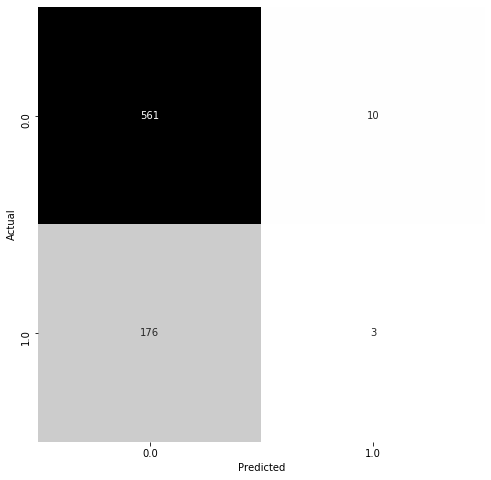

In [34]:
confusion_matrix_plot(test_targets.reshape(-1, 1), model_predictions)

The diagram shown is called a "confusion matrix." The diagonal elements show the number of correct predictions. The off-diagonal elements show the number of incorrect predictions. We can see that the model performs reasonably-well, but does so by overpredicting non-default. This suggests that we may need to train longer, tune the model's hyperparameters, or change the model's architecture.